## 1. Stochastis Gradient Descent
SGD dùng từng mẫu dữ liệu để cập nhật toàn bộ tham số :
- Tính Feed forward 
- Tình loss
- Tính đạo hàm cho từng tham số  
- Cập nhật 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

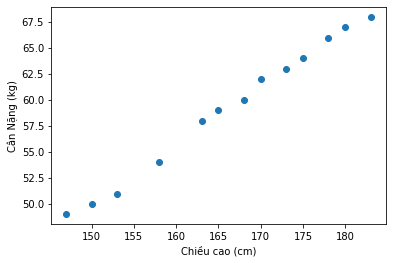

In [3]:
data_file = '../data/LR1.csv'
data = pd.read_csv(data_file)
inputs, outputs = data.iloc[:, 0:1], data.iloc[:, 1]
X, y = np.array(inputs.values), np.array(outputs.values)

plt.scatter(X, y)
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân Nặng (kg)')
plt.show()

In [11]:
Xbar = np.concatenate((np.ones((X.size, 1)), X), axis = 1)

N = X.size

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [15]:
def SGD():
    n_epochs = 50
    lr = 0.01
    
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(N):
            # lấy ngẫu nhiên 1 sample
            random_index = np.random.randint(N)
            xi = Xbar[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # tính output (o = x1*w1 + x2*w2)
            oi = xi.dot(thetas)
            
            # tính loss li [l = (output - y)^2]
            li = (oi - yi)*(oi - yi)
            
            # tính gradient cho loss
            g_li = 2*(oi - yi)
            
            # tính gradient (g_x1 = x1*g_li) và (g_x2 = x2*g_li)
            gradients = xi.T.dot(g_li)
                        
            # update giá trị theta
            thetas = thetas - learning_rate*gradients
            
            # logging
            thetas_path.append(thetas)            
            losses.append(li[0][0])
    return thetas_path, losses

bgd_thetas, losses = SGD()

plt.scatter(X, y)
x0 = np.linspace(start = 145, stop = 190, num = 20)
y0 = x0*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
plt.plot(x0, y0, 'r')
plt.show()           
            

IndentationError: unexpected indent (<ipython-input-15-3dc1a092c873>, line 9)